[[2.986636971046771, 9.0, 3.4953229398663694], [2.986636971046771, -1.0, 3.4953229398663694], [5.013363028953229, 9.0, -2.29532293986637], [5.013363028953229, -1.0, -2.29532293986637]]
[[-10.86875108528878, 22.81845676875758, 7.627934019841353], [2.986636971046771, 9.0, 3.4953229398663694], [-10.86875108528878, -14.818456768757581, 7.627934019841353], [2.986636971046771, -1.0, 3.4953229398663694], [-3.2407797447233477, 22.818456768757578, -14.1662698103456], [5.013363028953229, 9.0, -2.29532293986637], [-3.2407797447233477, -14.81845676875758, -14.1662698103456], [5.013363028953229, -1.0, -2.29532293986637]]


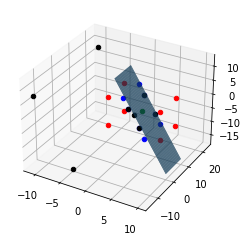

In [71]:
from operator import length_hint
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import OrderedDict

def vertices(Xc,Yc,Zc,SL):
    return [[Xc + SL/2, Yc + SL/2, Zc + SL/2],
            [Xc + SL/2, Yc + SL/2, Zc - SL/2],
            [Xc + SL/2, Yc - SL/2, Zc + SL/2],
            [Xc + SL/2, Yc - SL/2, Zc - SL/2],
            [Xc - SL/2, Yc + SL/2, Zc + SL/2],
            [Xc - SL/2, Yc + SL/2, Zc - SL/2],
            [Xc - SL/2, Yc - SL/2, Zc + SL/2],
            [Xc - SL/2, Yc - SL/2, Zc - SL/2]]

points= vertices(4,4,0.6, 10)
#print(points)

Lidar_location= [8,4,2]

#normal vector 
targetlocation=[4,4,0.6]
x_norm=targetlocation[0]-Lidar_location[0]
y_norm=targetlocation[1]-Lidar_location[1]
z_norm=targetlocation[2]-Lidar_location[2]

#equation of the plane

d=-(x_norm*targetlocation[0]+y_norm*targetlocation[1]+z_norm*targetlocation[2])

plane=[-x_norm,-y_norm,-z_norm,d]

#projection of the box points on to the normal plane

points_projected=[]
tuple_array=[]
for point in points:
  k =(plane[3] - (plane[0]*point[0]) - (plane[1]*point[1]) - (plane[2]*point[2]))/(plane[0]*plane[0] + plane[1]*plane[1] +plane[2]*plane[2])
  proj_point=[point[0]+(k*plane[0]), point[1]+(k*plane[1]), point[2]+(k*plane[2])]
  dist = round(np.linalg.norm(np.array(proj_point)-np.array(targetlocation)))
  #direction vector between the projected points
  dv=[Lidar_location[0]-proj_point[0],Lidar_location[1]-proj_point[1],Lidar_location[2]-proj_point[2]]
  
  points_projected.append(proj_point)
  object_tuple=tuple([dist,tuple(proj_point),tuple(dv)])
  if object_tuple not in tuple_array:
    tuple_array.append(object_tuple)

tuple_array.sort(key=lambda x:x[0])


points_projected_sorted=[list(x[1]) for x in tuple_array]
points_projected_sorted=points_projected_sorted[:4]

print(points_projected_sorted)
fig = plt.figure()
ax = plt.axes(projection ='3d')


for p in points:
    ax.scatter(p[0], p[1], p[2], c='r')

ax.scatter(targetlocation[0], targetlocation[1], targetlocation[2], zdir='z', c='g')

for p in points_projected:
    ax.scatter(p[0], p[1], p[2], c='b')

frustrum_points=[]
for p in points_projected_sorted:
    vx=-(p[0]-Lidar_location[0])
    vy=-(p[1]-Lidar_location[1])
    vz=-(p[2]-Lidar_location[2])

    length=math.sqrt((vx*vx)+(vy*vy)+(vz*vz))
    vx_norm=20*vx/length
    vy_norm=20*vy/length
    vz_norm=20*vz/length

    frus_point=[p[0]-vx_norm,p[1]-vy_norm,p[2]-vz_norm]
    frustrum_points.append(frus_point)
    frustrum_points.append(p)

for p in frustrum_points:
    ax.scatter(p[0], p[1], p[2], c='k')

print(frustrum_points)

a,b,c,d = plane[0],plane[1],plane[2],plane[3]

x = np.linspace(0,10,200)
y = np.linspace(0,10,200)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

#print(Z)
ax.plot_surface(X, Y, Z)




<ipython-input-14-ee44bc3c2dbe>:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


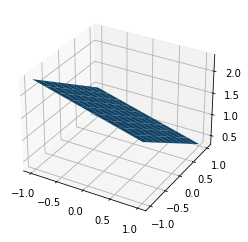

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a,b,c,d = 1,2,3,4

x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z)

In [ ]:
lidar_location=[0,0,2]
box_center=[0,0,0]
# Find direction ratio of line BC
BCx = box_center[0] - lidar_location[0]
BCy = box_center[1] - lidar_location[1]
BCz = box_center[2] - lidar_location[2]
tuple_array=[]
for point in points_projected:
    ABx = point[0] - lidar_location[0]
    ABy = point[1] - lidar_location[1]
    ABz = point[2] - lidar_location[2]
 
    # Find the dotProduct
    # of lines AB & BC
    dotProduct = (ABx * BCx +
                  ABy * BCy +
                  ABz * BCz)
 
    # Find magnitude of
    # line AB and BC
    magnitudeAB = (ABx * ABx +
                   ABy * ABy +
                   ABz * ABz)
    magnitudeBC = (BCx * BCx +
                   BCy * BCy +
                   BCz * BCz)
 
    # Find the cosine of
    # the angle formed
    # by line AB and BC
    angle = dotProduct
    angle /= math.sqrt(magnitudeAB *
                       magnitudeBC)
 
    # Find angle in radian
    angle = (angle * 180) / 3.14

    #direction vector between the projected points to get unique projection
    dv=[lidar_location[0]-point[0],lidar_location[1]-point[1],lidar_location[2]-point[2]]
    points_projected.append(point)

    #create a object tuple
    object_tuple=tuple([abs(angle),tuple(point),tuple(dv)])
    if object_tuple not in tuple_array:
        tuple_array.append(object_tuple)

tuple_array.sort(key=lambda x:x[0])
points_projected_sorted=[list(x[1]) for x in tuple_array]
if len(points_projected_sorted)>4:
    points_projected_sorted=points_projected_sorted[:4]